In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Set visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)
X = StandardScaler().fit_transform(X)

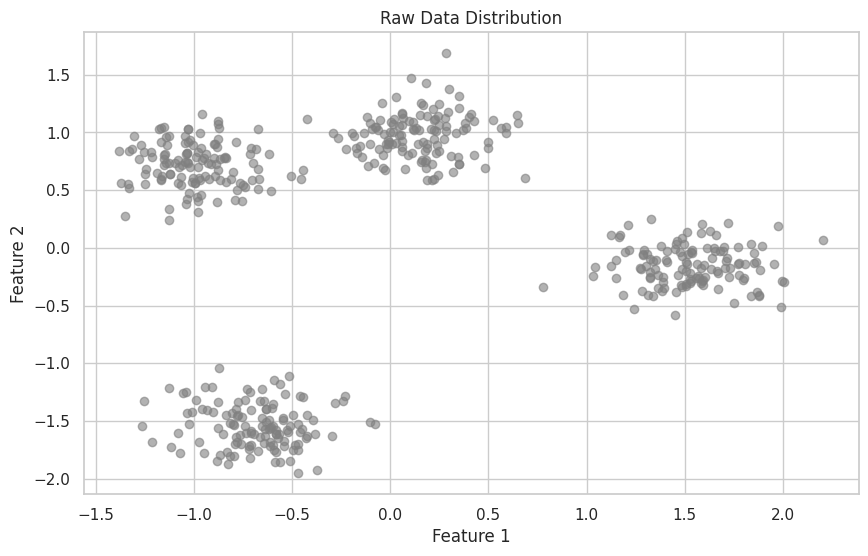

In [4]:
# Preview data
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6)
plt.title("Raw Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [6]:
# Function to plot clustering results
def plot_clusters(X, labels, title):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

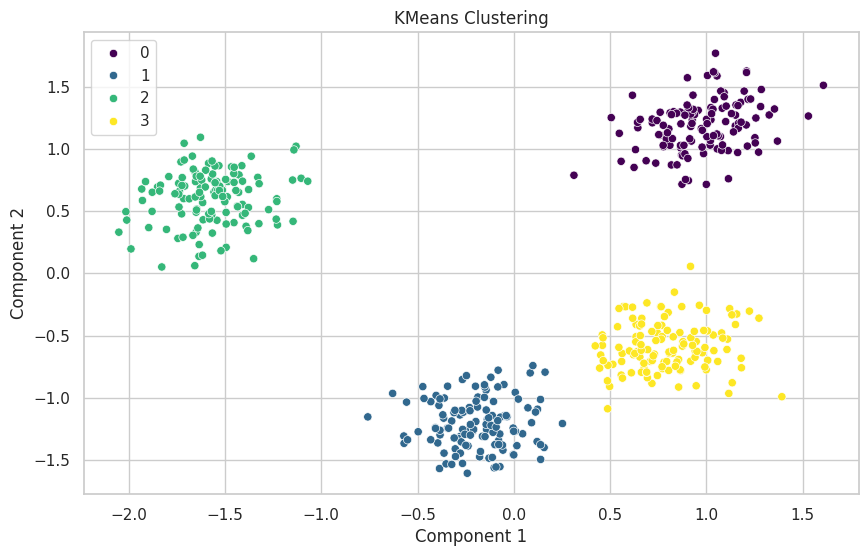

In [7]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
plot_clusters(X_pca, kmeans_labels, "KMeans Clustering")

In [8]:
# Elbow method for optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

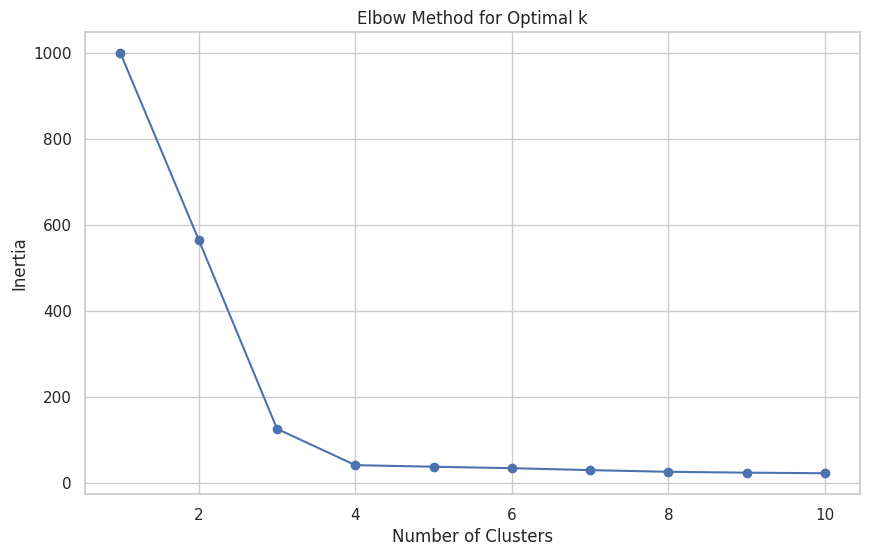

In [9]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [10]:
# Silhouette score visualization
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

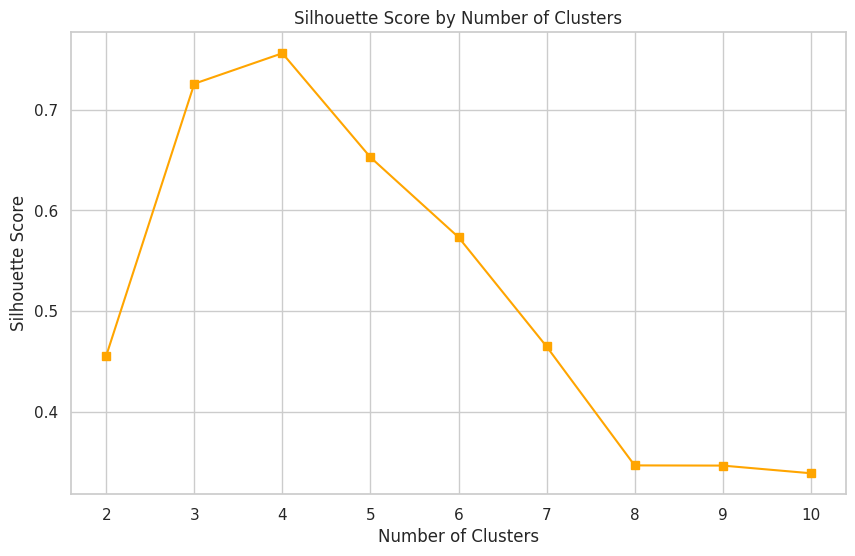

In [11]:
plt.plot(range(2, 11), sil_scores, marker='s', color='orange')
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

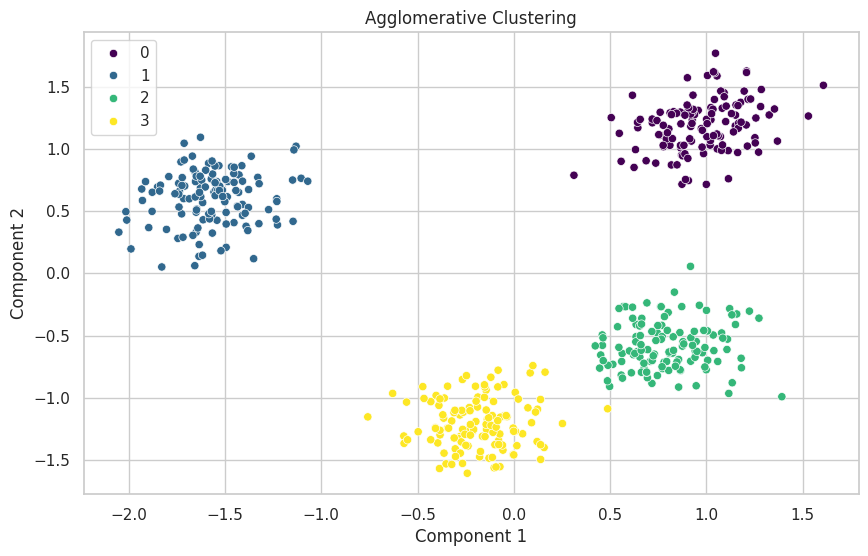

In [12]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X)
plot_clusters(X_pca, agg_labels, "Agglomerative Clustering")

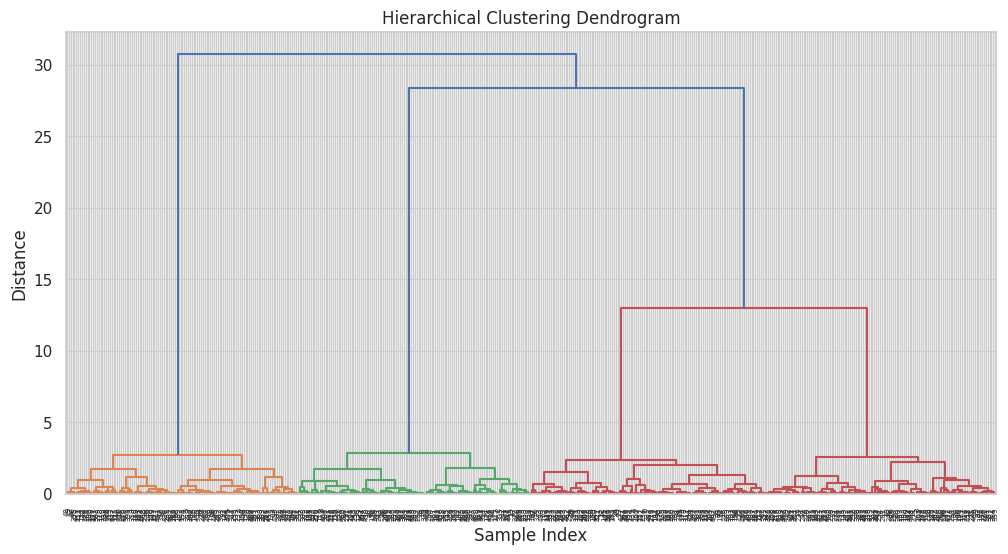

In [13]:
# Dendrogram
Z = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

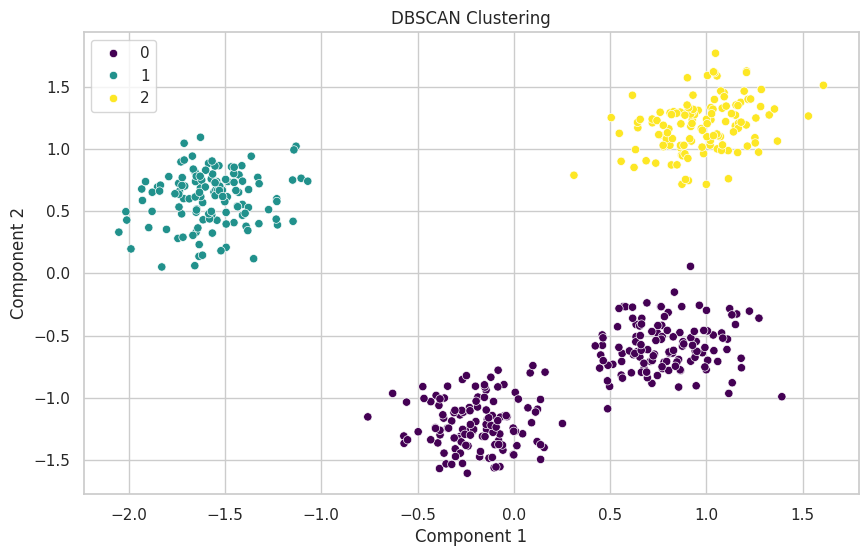

In [14]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X)
plot_clusters(X_pca, db_labels, "DBSCAN Clustering")

In [15]:
# Compare clustering metrics
kmeans_score = silhouette_score(X, kmeans_labels)
agg_score = silhouette_score(X, agg_labels)
db_score = silhouette_score(X, db_labels, metric='euclidean') if len(set(db_labels)) > 1 else -1

In [16]:
metrics_df = pd.DataFrame({
    'Method': ['KMeans', 'Agglomerative', 'DBSCAN'],
    'Silhouette Score': [kmeans_score, agg_score, db_score],
    'Calinski-Harabasz Score': [
        calinski_harabasz_score(X, kmeans_labels),
        calinski_harabasz_score(X, agg_labels),
        calinski_harabasz_score(X, db_labels) if len(set(db_labels)) > 1 else -1
    ]
})


In [17]:
print(metrics_df)

          Method  Silhouette Score  Calinski-Harabasz Score
0         KMeans          0.755747              3882.313638
1  Agglomerative          0.754934              3870.191488
2         DBSCAN          0.726238              1732.433518


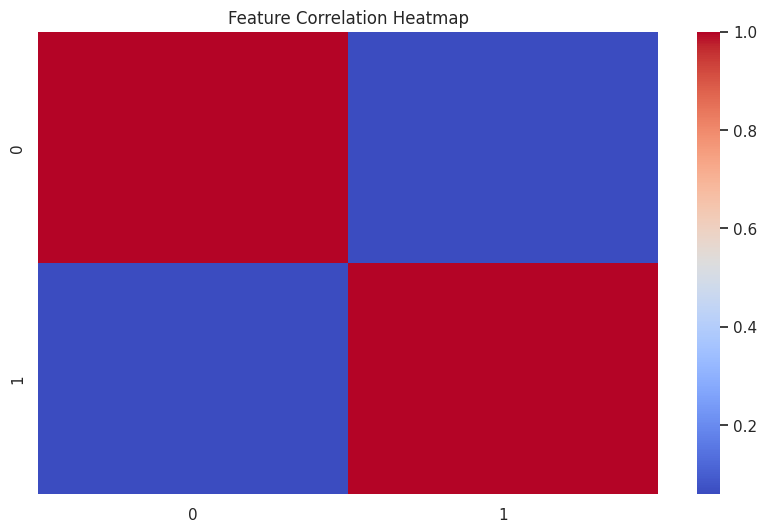

In [18]:
# Heatmap of feature correlation (not meaningful in synthetic data but illustrative)
sns.heatmap(pd.DataFrame(X).corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


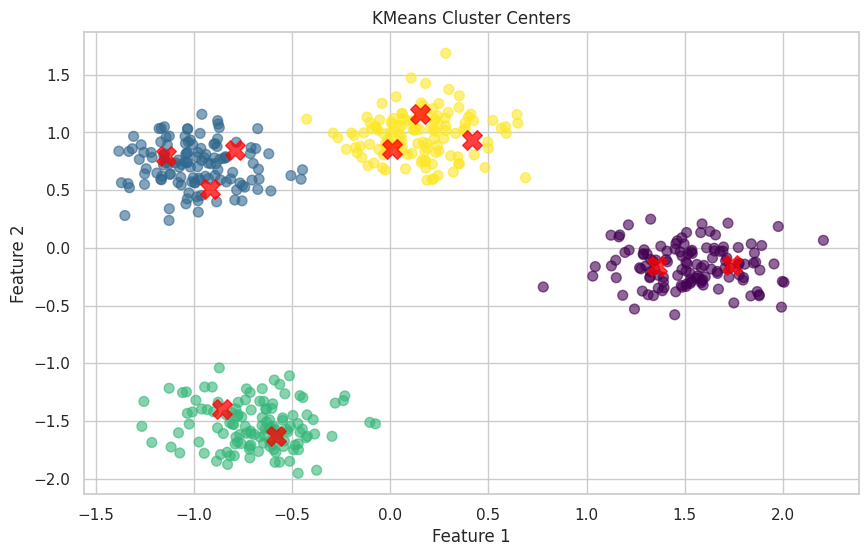

In [19]:

# Cluster centers visualization (KMeans)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("KMeans Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()